# SEMMA

**SEMMA (Sample, Explore, Modify, Model, Assess)** is a methodology used for data mining and analytics, primarily focused on turning raw data into actionable insights. The phases, as the name suggests, are as follows:

1. Sample
2. Explore
3. Modify
4. Model
5. Assess

## 1. Sample

The goal of this phase is to select a representative subset of the data to work with. This helps you understand the data structure and reduces the computational load during exploration and model testing.

As we are trying to predict Student Performance, we will be using the appropriate [Student Performance Factors dataset](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors) from Kaggle.

Firstly, we will import all required libraries, files, and dataset.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
# Uploading kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Accessing dataset from kaggle directly
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 49.1MB/s]


In [ ]:
# Extracting the csv
!unzip student-performance-factors.zip
!rm -rf student-performance-factors.zip

Archive:  student-performance-factors.zip
  inflating: StudentPerformanceFactors.csv  


In [ ]:
# Loading the dataset into a dataframe
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


With the dataset loaded, we can now take an initial look on it. For the sample phase, we need to do some checks before sampling like data types and missing values.

In [ ]:
# Get some basic info on all columns in the df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Get some statistical info on the numerical columns
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [ ]:
# Check for missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
# Drop all missing values for the sample df (will impute later)
init_df = df.dropna()
print(init_df.isnull().sum())

print(df.shape)
print(init_df.shape)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
(6607, 20)
(6378, 20)


Having dropped 200+ rows, we can now extract the sample from our df and move to the next phase.

In [ ]:
# Stratified sampling to maintain the distribution of target variable (if it's categorical)
sample_df, _ = train_test_split(init_df, test_size=0.8)

In [ ]:
# Compare distributions between the sample and the full dataset
print(sample_df.describe())
print(init_df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    1275.000000  1275.000000  1275.000000      1275.000000   
mean       20.158431    79.779608     7.035294        74.535686   
std         6.055603    11.419332     1.466906        14.447521   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        62.000000   
50%        20.000000    79.000000     7.000000        74.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        37.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        1275.000000        1275.000000  1275.000000  
mean            1.450196           2.939608    67.229020  
std             1.202949           1.043162     4.004425  
min             0.000000           0.000000    58.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

We can consider this a good sample as the sampled metrics look close to the actual ones.

## 2. Explore

In this phase, we examine the data through visualization, descriptive statistics, and understanding patterns or anomalies.

We will start by creating histograms and boxplot distributions of the numerical features.

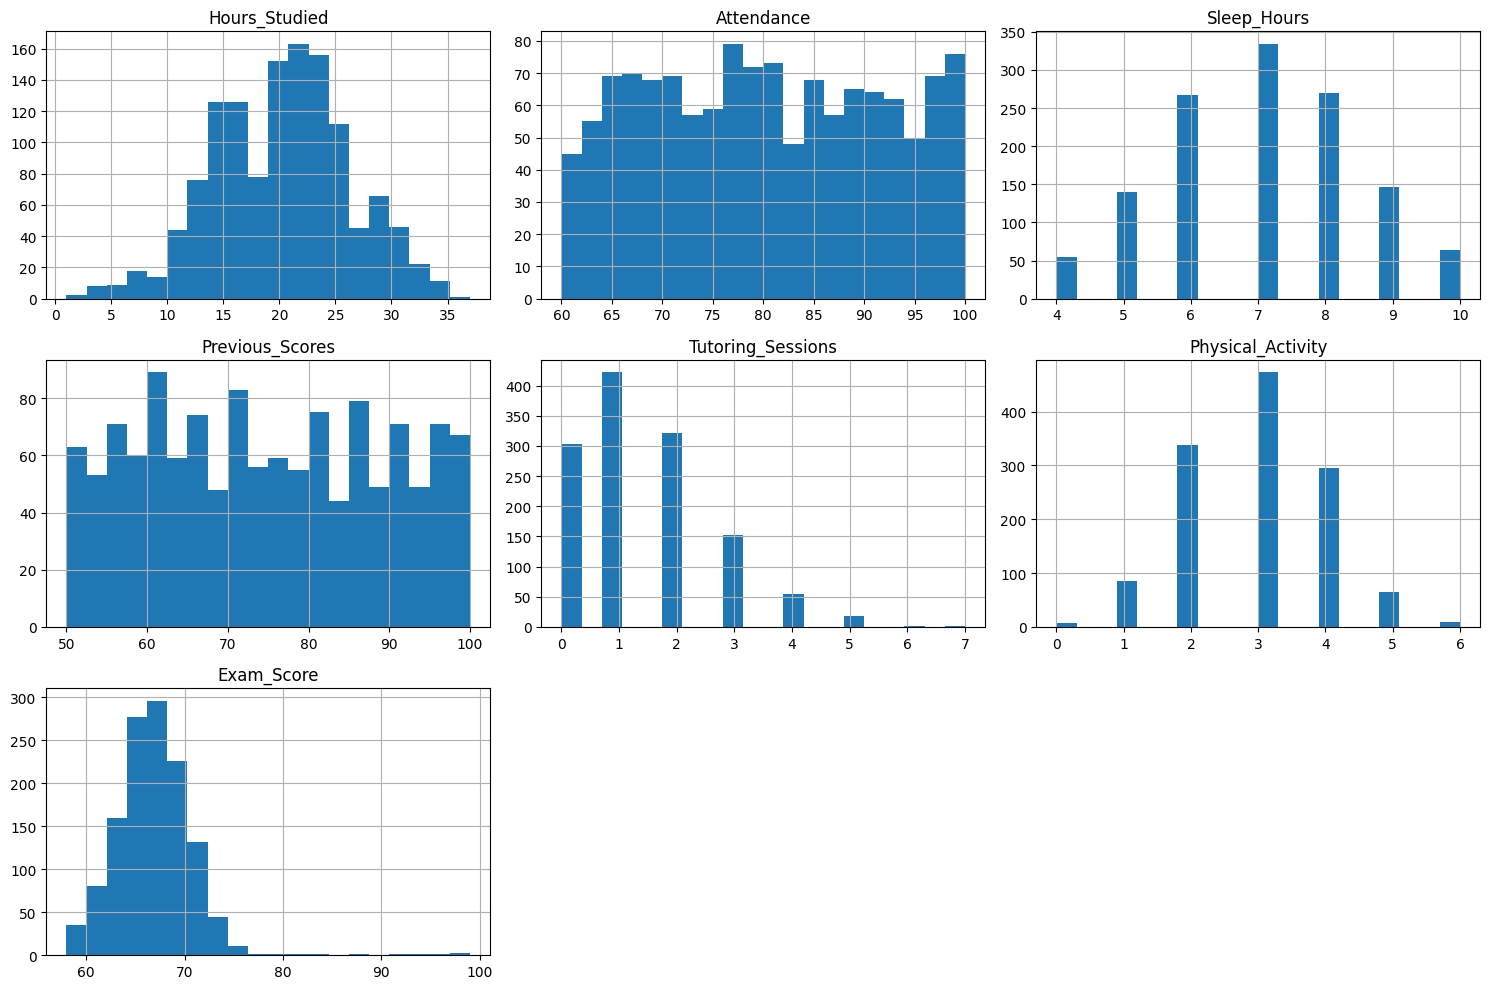

In [ ]:
# Plot histograms for numerical columns
sample_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

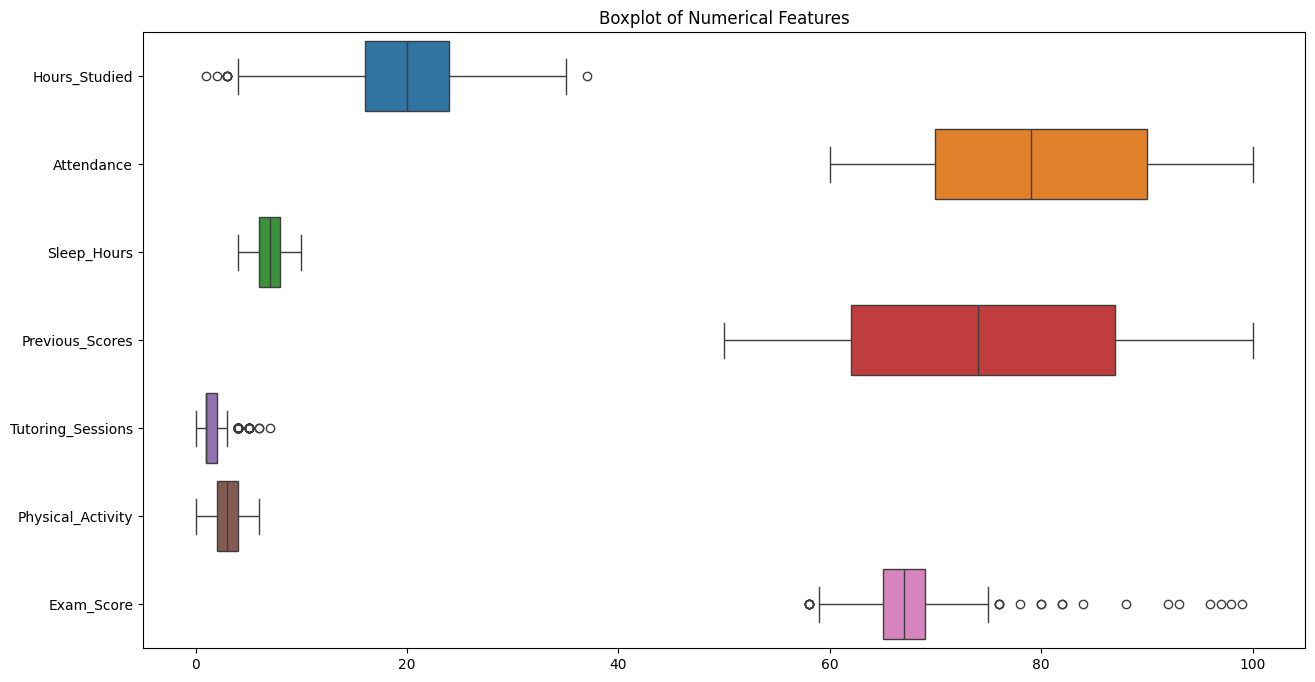

In [ ]:
# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=sample_df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

We can also plot correlation matrix for the numerical columns.

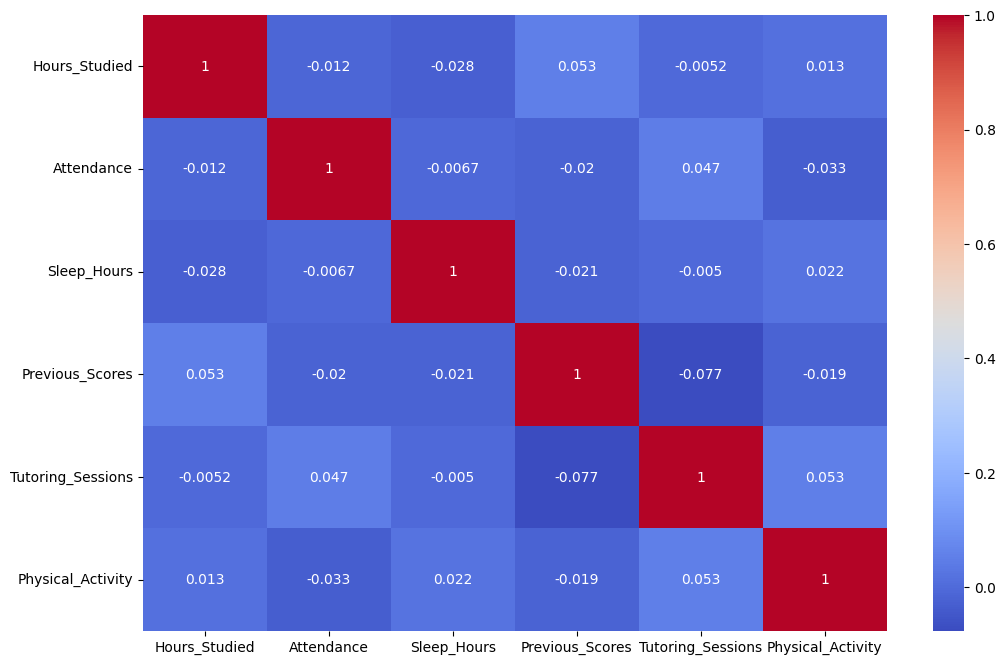

In [25]:
# Correlation matrix
df_numerical = sample_df.select_dtypes(include=['number'])
df_numerical = df_numerical.drop('Exam_Score', axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

Most of the columns seem independent as the correlation is low between them. Now, let's create scatterplots of some numerical features against the target variable.

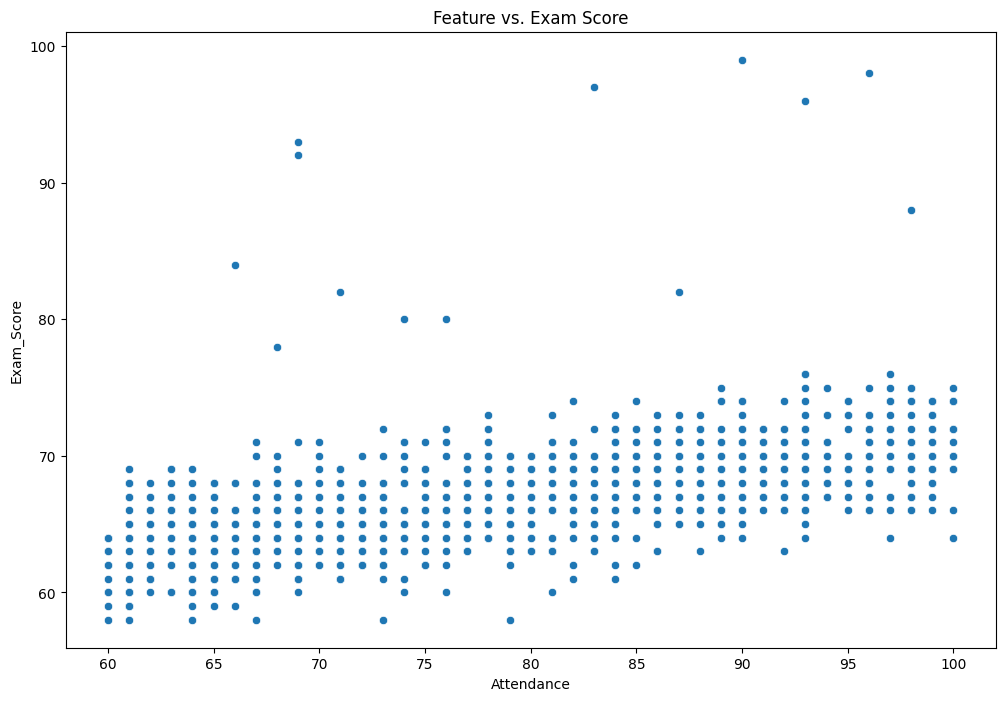

In [26]:
# Scatter plot of attendance vs. exam score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_df, x='Attendance', y='Exam_Score')
plt.title('Attendace vs. Exam Score')
plt.show()

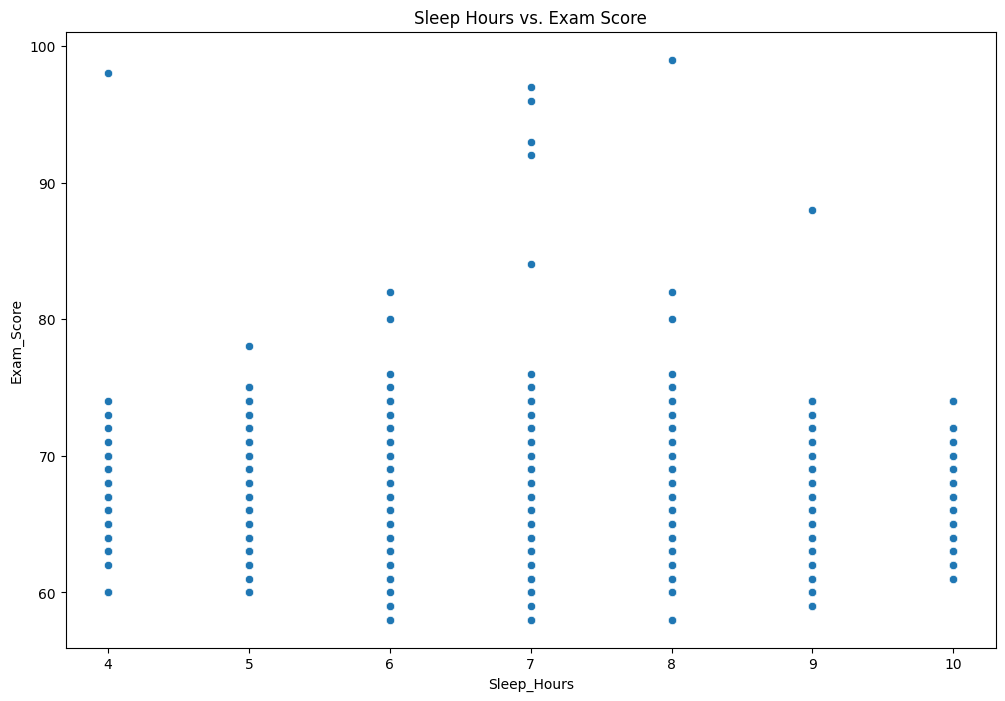

In [27]:
# Scatter plot of sleep hours vs. exam score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_df, x='Sleep_Hours', y='Exam_Score')
plt.title('Sleep Hours vs. Exam Score')
plt.show()

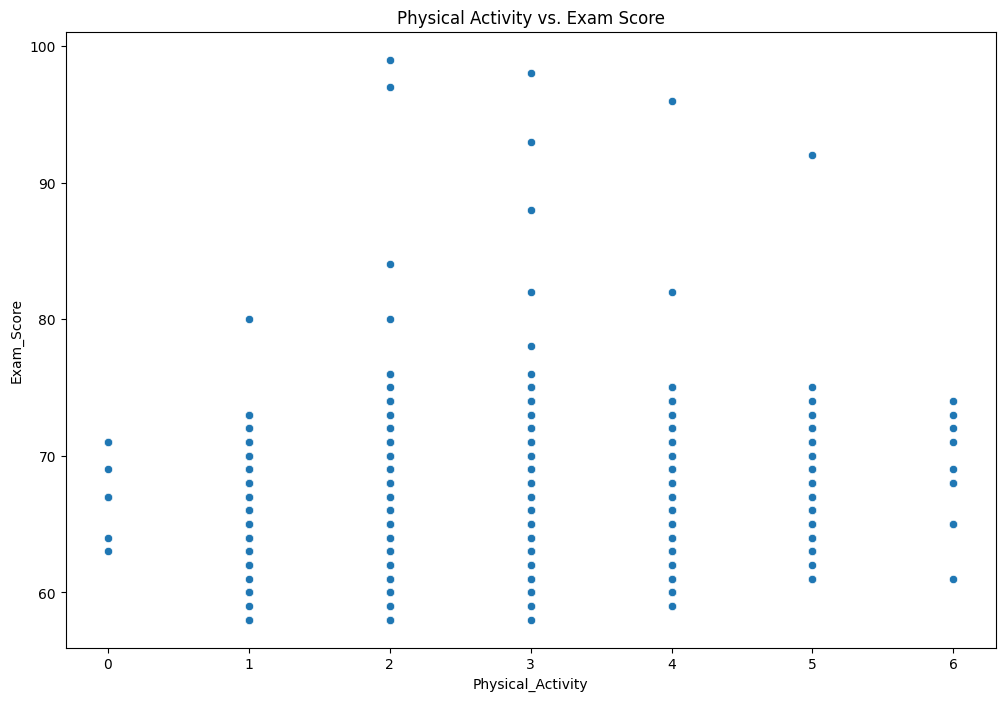

In [28]:
# Scatter plot of physical activity vs. exam score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_df, x='Physical_Activity', y='Exam_Score')
plt.title('Physical Activity vs. Exam Score')
plt.show()

While attendance seemed to show some trend, it is difficult to gauge anything about the other two columns having a direct correlation with exam score. Let us look at the categorical columns now.

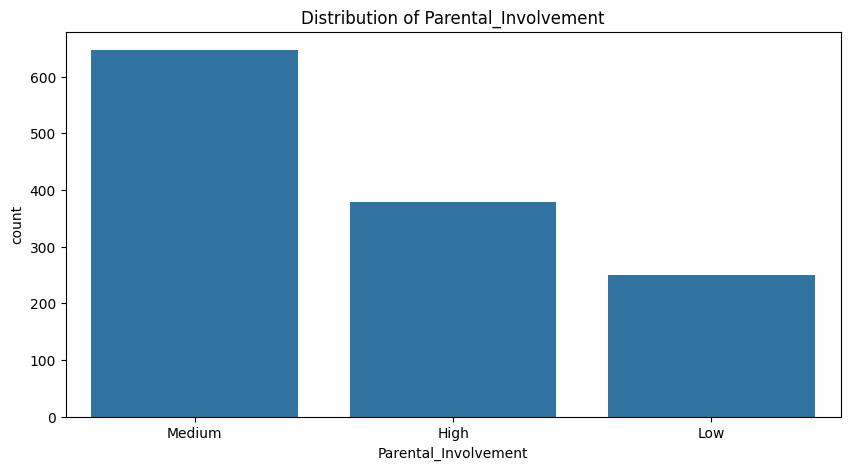

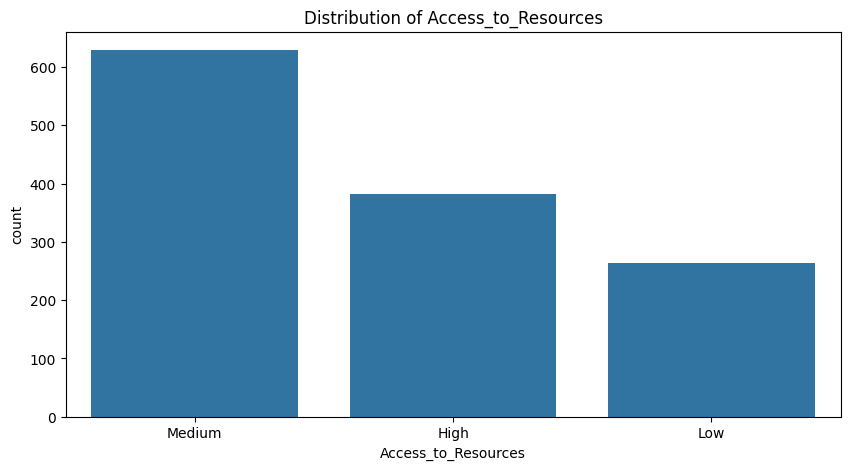

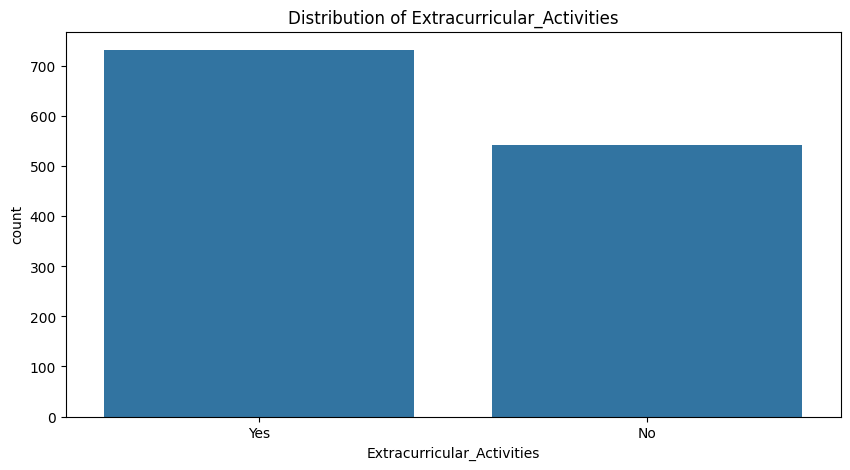

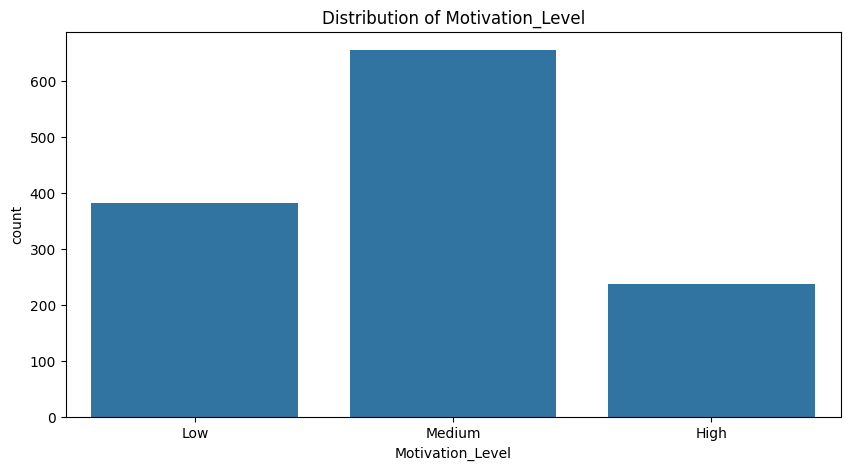

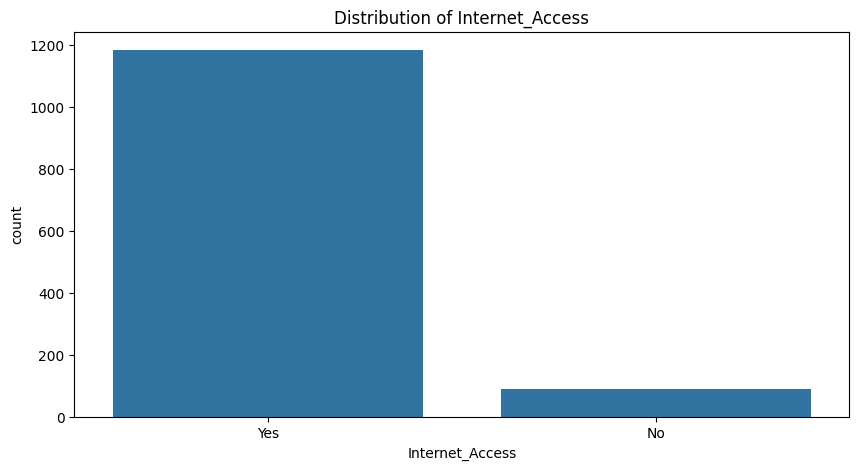

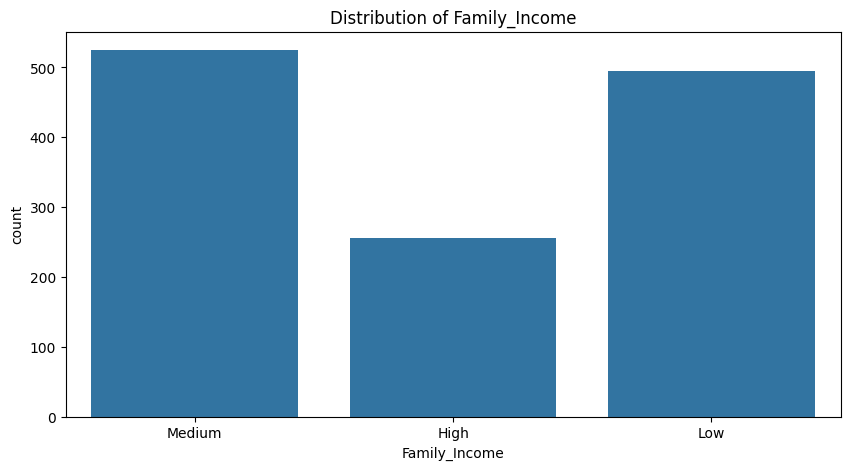

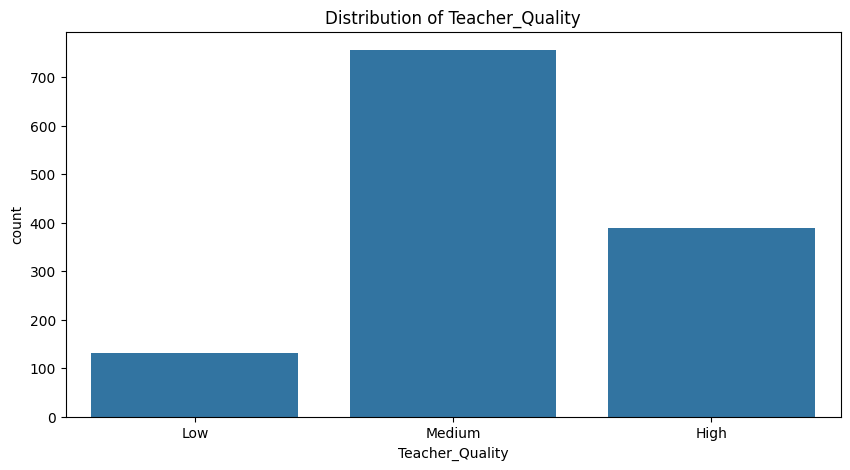

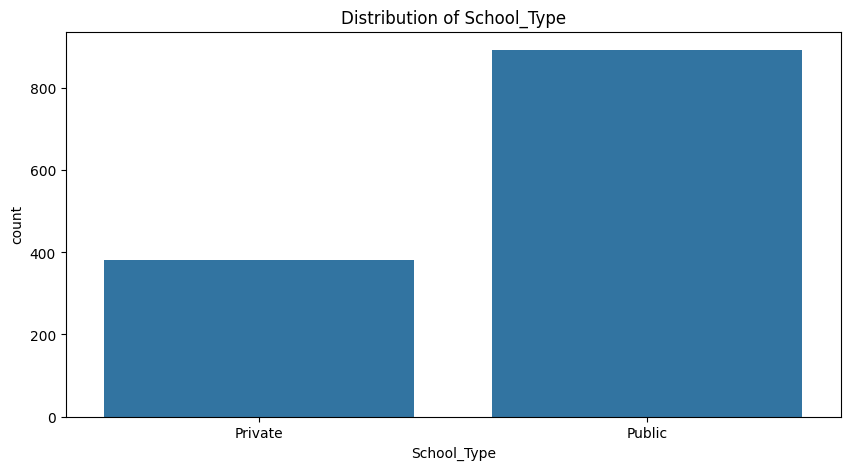

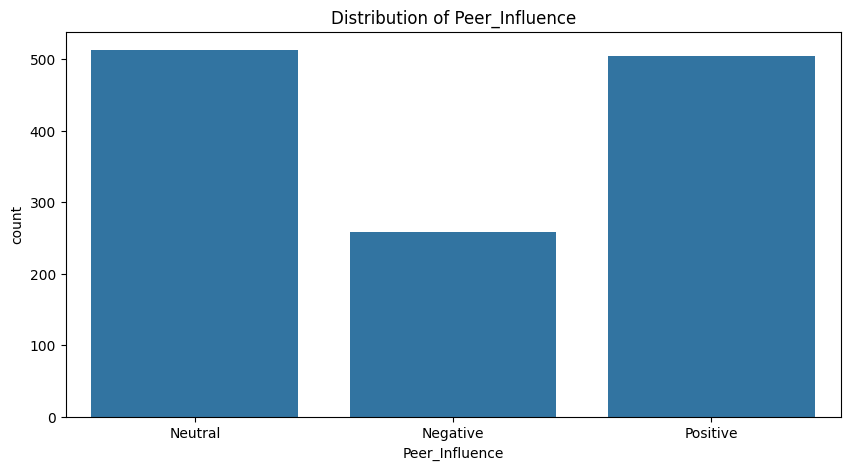

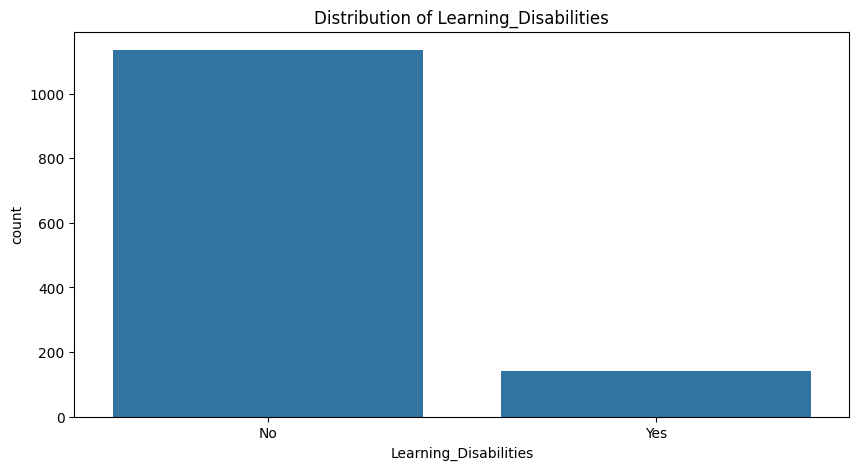

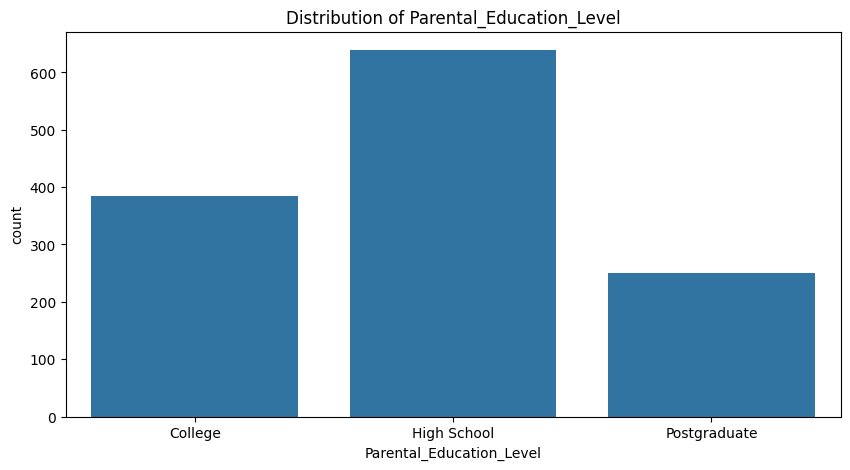

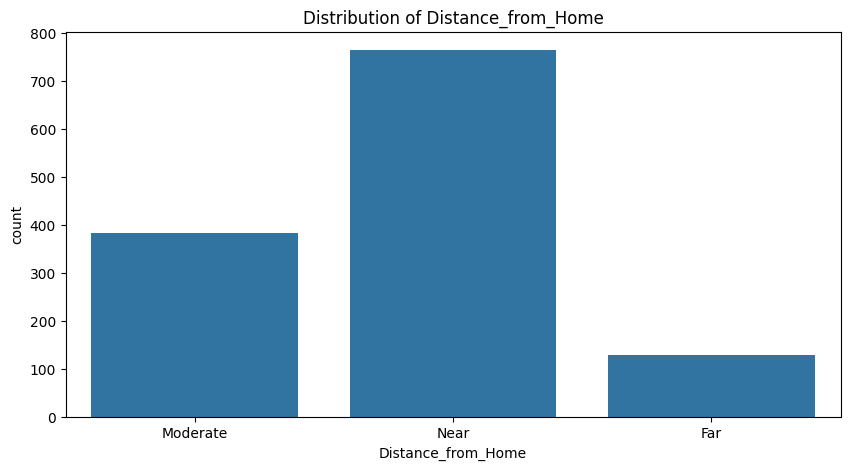

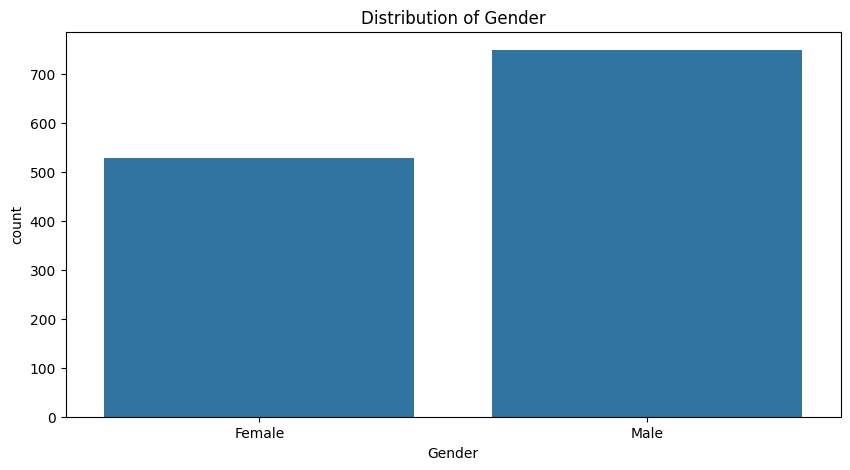

In [31]:
# Plotting categorical features
categorical_cols = sample_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=sample_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

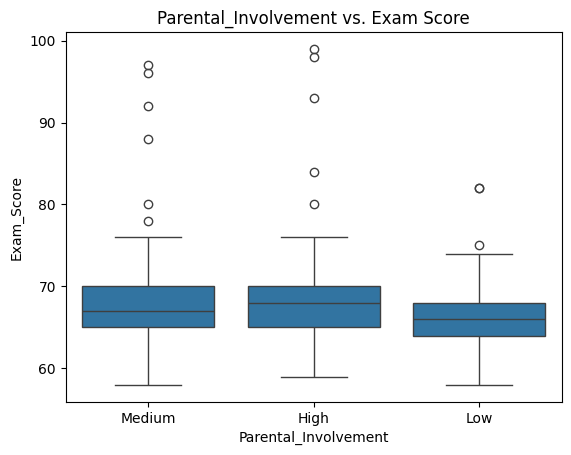

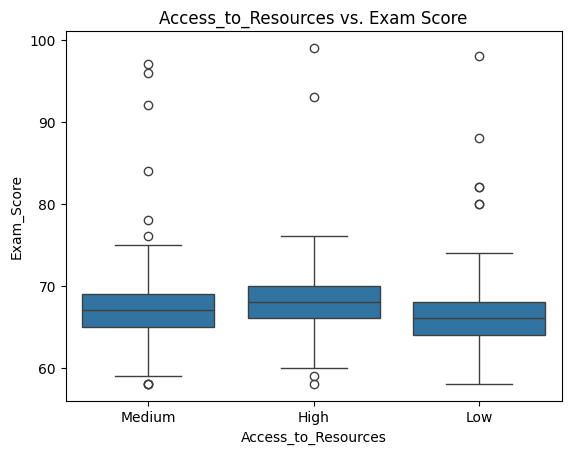

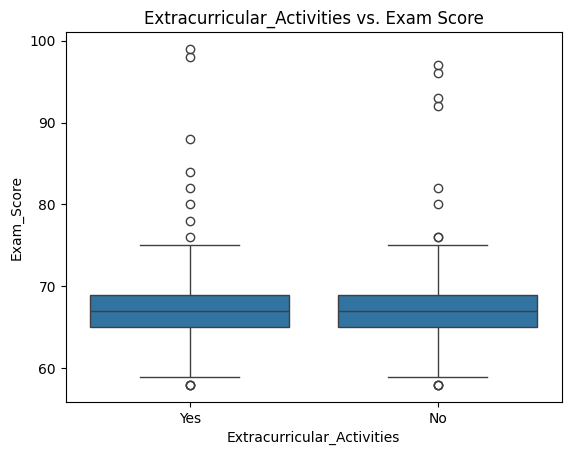

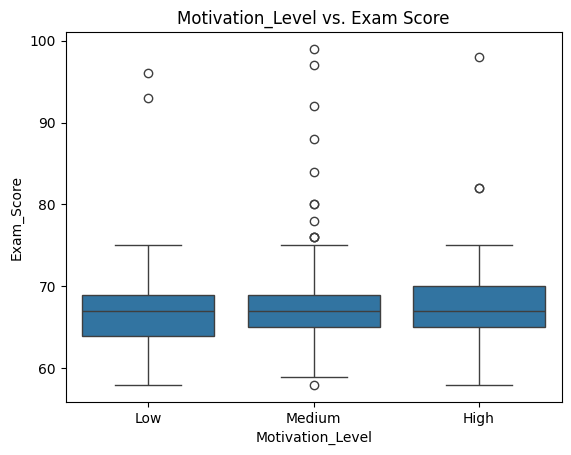

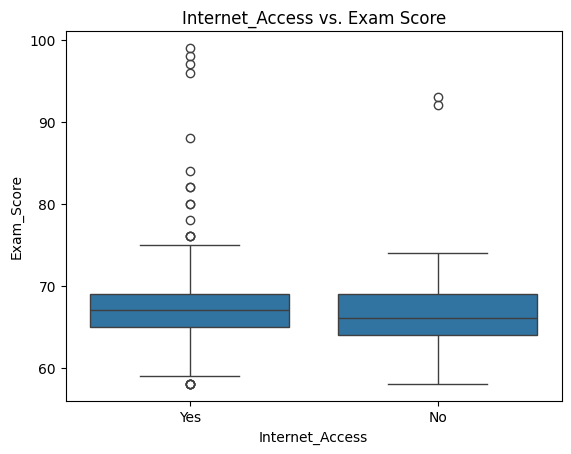

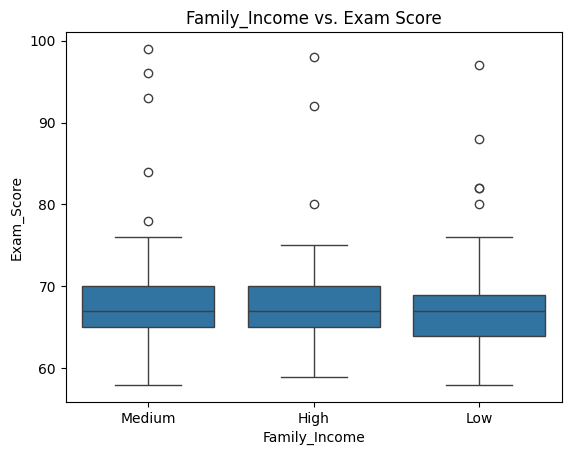

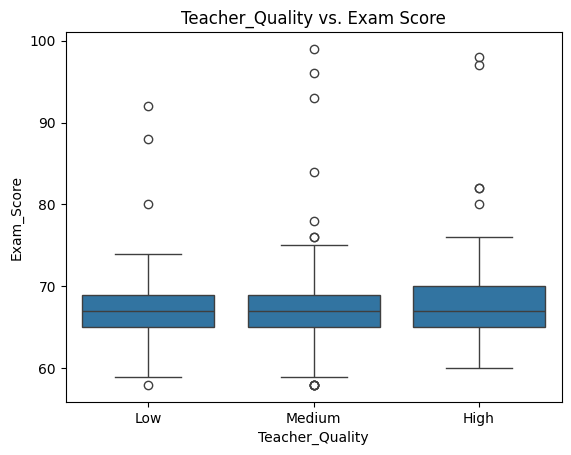

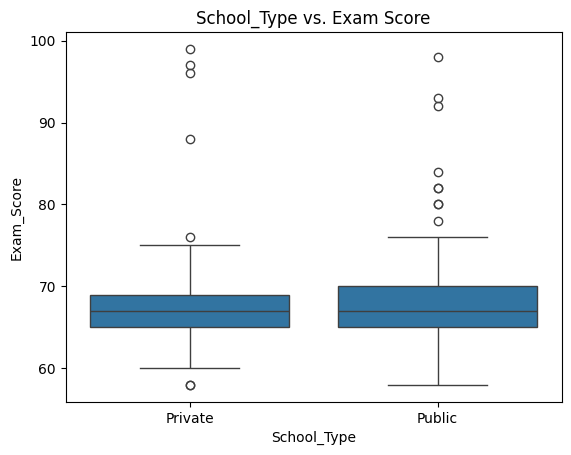

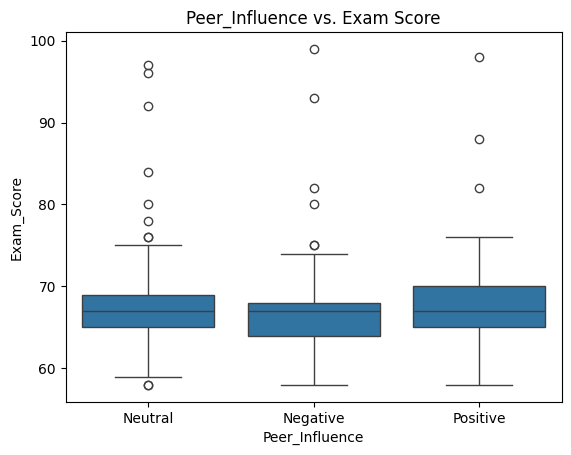

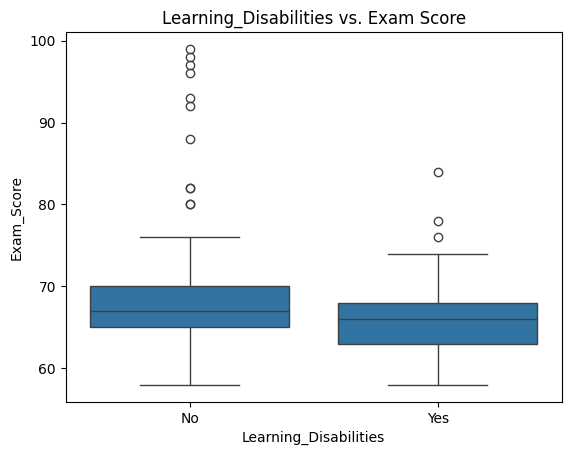

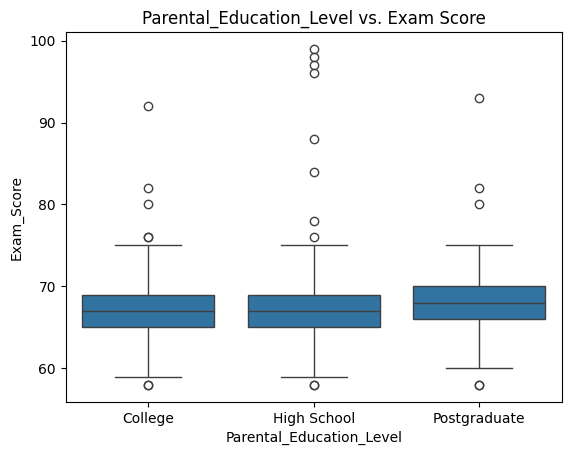

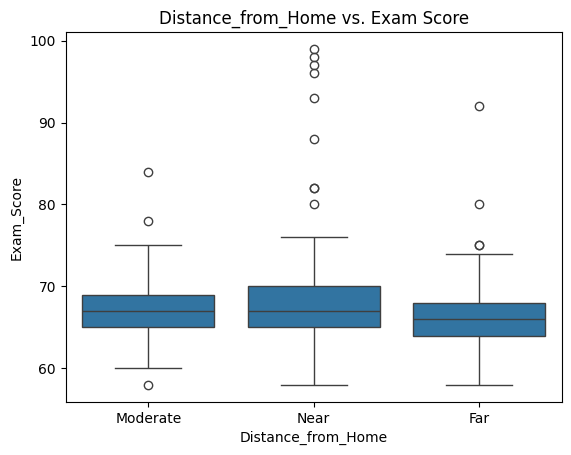

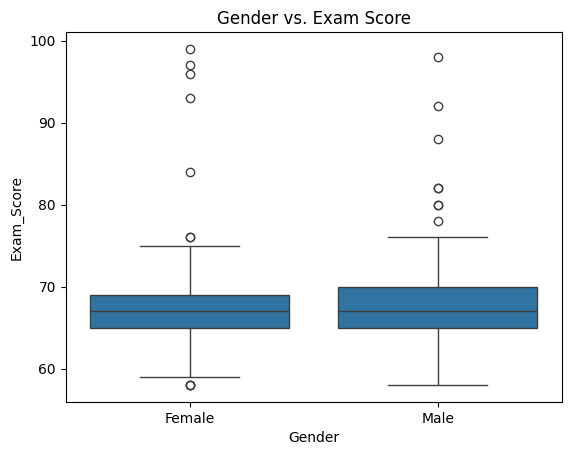

In [32]:
# Plotting boxplots against Exam Score
for col in categorical_cols:
    sns.boxplot(data=sample_df, x=col, y='Exam_Score')
    plt.title(f'{col} vs. Exam Score')
    plt.show()

There seems to be some minor influence from different categorical columns on our data. Finally, let us try correlation of features with target.

In [35]:
# Correlation with the target variable
df_numerical = sample_df.select_dtypes(include=['number'])
correlation_with_target = df_numerical.corr()['Exam_Score'].sort_values(ascending=False)
print(correlation_with_target)

Exam_Score           1.000000
Attendance           0.559438
Hours_Studied        0.448597
Previous_Scores      0.198241
Tutoring_Sessions    0.177699
Physical_Activity    0.047847
Sleep_Hours         -0.033180
Name: Exam_Score, dtype: float64


There seems to be a reasonably high correlation with attendance and number of hours studied. With this information, let's move to the next phase.

## 3. Modify

In this phase, we transform the data to prepare it for modeling, including feature engineering, handling missing values, and normalizing variables.

First, we will perform some imputation methods on the missing data. As we can see, there are three columns with missing data - Teacher Quality, Parental Education Level, and Distance From Home.

In [37]:
# Check missing data
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


As all the three columns are categorical, we can simply replace them with the highest frequency value from their respective columns.

In [41]:
# Perform imputation
missing_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

for column in missing_columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


With the missing data handled, we can now encode categorical variables to prepare them for modeling phase. We will apply the following encoding on the columns:
1. Parental_Involvement - Ordinal Encoding
2. Access_to_Resources - Ordinal Encoding
3. Extracurricular_Activities - Binary Encoding
4. Motivation_Level - Ordinal Encoding
5. Internet_Access - Binary Encoding
6. Family_Income - Ordinal Encoding
7. Teacher_Quality - Ordinal Encoding
8. School_Type - Binary Encoding
9. Peer_Influence - Ordinal Encoding
10. Learning_Disabilities - Binary Encoding
11. Parental_Education_Level - Ordinal Encoding
12. Distance_from_Home - Ordinal Encoding
13. Gender - Binary Encoding

In [47]:
# 1. Ordinal Encoding for 'Parental_Involvement'
parental_involvement_order = ['Low', 'Medium', 'High']
df['Parental_Involvement'] = OrdinalEncoder(categories=[parental_involvement_order]).fit_transform(df[['Parental_Involvement']])

# 2. Ordinal Encoding for 'Access_to_Resources'
resources_order = ['Low', 'Medium', 'High']
df['Access_to_Resources'] = OrdinalEncoder(categories=[resources_order]).fit_transform(df[['Access_to_Resources']])

# 3. Binary Encoding for 'Extracurricular_Activities'
df['Extracurricular_Activities'] = LabelEncoder().fit_transform(df['Extracurricular_Activities'])

# 4. Ordinal Encoding for 'Motivation_Level'
motivation_order = ['Low', 'Medium', 'High']
df['Motivation_Level'] = OrdinalEncoder(categories=[motivation_order]).fit_transform(df[['Motivation_Level']])

# 5. Binary Encoding for 'Internet_Access'
df['Internet_Access'] = LabelEncoder().fit_transform(df['Internet_Access'])

# 6. Ordinal Encoding for 'Family_Income'
income_order = ['Low', 'Medium', 'High']
df['Family_Income'] = OrdinalEncoder(categories=[income_order]).fit_transform(df[['Family_Income']])

# 7. Ordinal Encoding for 'Teacher_Quality'
teacher_quality_order = ['Low', 'Medium', 'High']
df['Teacher_Quality'] = OrdinalEncoder(categories=[teacher_quality_order]).fit_transform(df[['Teacher_Quality']])

# 8. Binary Encoding for 'School_Type'
df['School_Type'] = LabelEncoder().fit_transform(df['School_Type'])

# 9. Ordinal Encoding for 'Peer_Influence'
peer_influence_order = ['Negative', 'Neutral', 'Positive']
df['Peer_Influence'] = OrdinalEncoder(categories=[peer_influence_order]).fit_transform(df[['Peer_Influence']])

# 10. Binary Encoding for 'Learning_Disabilities'
df['Learning_Disabilities'] = LabelEncoder().fit_transform(df['Learning_Disabilities'])

# 11. Ordinal Encoding for 'Parental_Education_Level'
education_level_order = ['High School', 'College', 'Postgraduate']
df['Parental_Education_Level'] = OrdinalEncoder(categories=[education_level_order]).fit_transform(df[['Parental_Education_Level']])

# 12. Ordinal Encoding for 'Distance_from_Home'
distance_order = ['Near', 'Moderate', 'Far']
df['Distance_from_Home'] = OrdinalEncoder(categories=[distance_order]).fit_transform(df[['Distance_from_Home']])

# 13. Binary Encoding for 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0,7,73,0.0,1,0,0.0,1.0,1,2.0,3,0,0.0,0.0,1,67
1,19,64,0.0,1.0,0,8,59,0.0,1,2,1.0,1.0,1,0.0,4,0,1.0,1.0,0,61
2,24,98,1.0,1.0,1,7,91,1.0,1,2,1.0,1.0,1,1.0,4,0,2.0,0.0,1,74
3,29,89,0.0,1.0,1,8,98,1.0,1,1,1.0,1.0,1,0.0,4,0,0.0,1.0,1,71
4,19,92,1.0,1.0,1,6,65,1.0,1,3,1.0,2.0,1,1.0,4,0,1.0,0.0,0,70


Now, let's split the dataset into features and target, then normalize the numerical features. If required, we could also perform feature engineering here to create new features from existing ones. We can also select some of the features from our data here, discarding ones that are not as impactful, using techniques like Recursive Feature Elimination (RFE).

In [55]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.511628,0.600,0.0,1.0,0.0,0.500000,0.46,0.0,1.0,0.000,0.0,0.5,1.0,1.0,0.500000,0.0,0.0,0.0,1.0
1,0.418605,0.100,0.0,0.5,0.0,0.666667,0.18,0.0,1.0,0.250,0.5,0.5,1.0,0.0,0.666667,0.0,0.5,0.5,0.0
2,0.534884,0.950,0.5,0.5,1.0,0.500000,0.82,0.5,1.0,0.250,0.5,0.5,1.0,0.5,0.666667,0.0,1.0,0.0,1.0
3,0.651163,0.725,0.0,0.5,1.0,0.666667,0.96,0.5,1.0,0.125,0.5,0.5,1.0,0.0,0.666667,0.0,0.0,0.5,1.0
4,0.418605,0.800,0.5,0.5,1.0,0.333333,0.30,0.5,1.0,0.375,0.5,1.0,1.0,0.5,0.666667,0.0,0.5,0.0,0.0


## 4. Model

This phase involves building and training predictive models using the processed data.

Firstly, we will split the training and testing data from our dataset.

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5285, 19)
(5285,)
(1322, 19)
(1322,)


We will now use three different models to train this data:
1. Linear Regression
2. Decision Tree
3. Random Forest

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [60]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 3.24, R2: 0.77
Decision Tree - MSE: 9.80, R2: 0.31
Random Forest - MSE: 4.73, R2: 0.67


Linear Regression seems to be the best performer here, but let us try hyperparameter tuning with the Random Forest model once.

In [61]:
# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 15, 'n_estimators': 200}


In [62]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model - MSE: {mse:.2f}, R2: {r2:.2f}")

Best Model - MSE: 4.69, R2: 0.67


As Linear Regression has the best MSE and R2 metrics still, we can consider it to have the best model.

In [67]:
best = models['Linear Regression']
y_pred = best_model.predict(X_test)

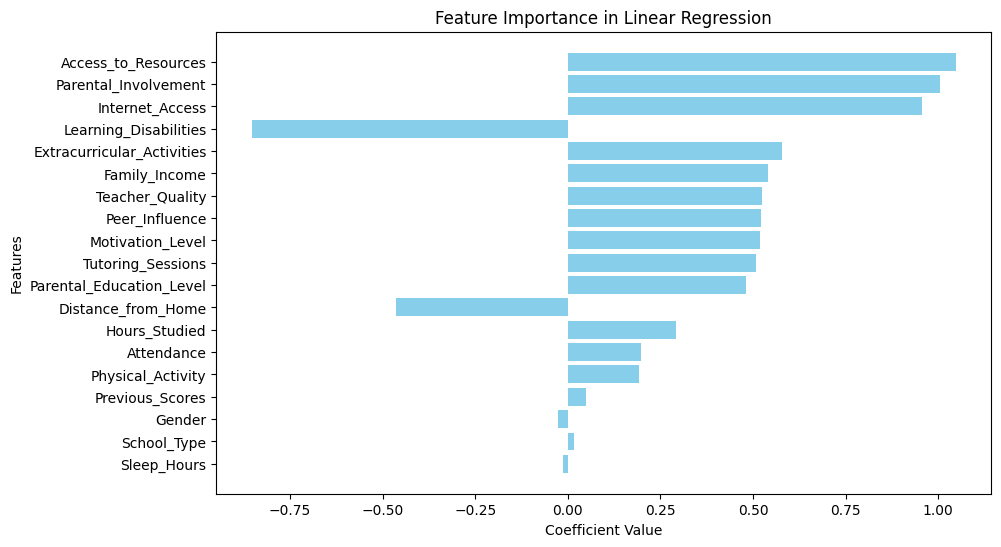

In [65]:
# Plot feature importance
features = X_train.columns
coefficients = best.coef_

coef_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})
coef_df['Abs_Importance'] = np.abs(coef_df['Importance'])
coef_df = coef_df.sort_values(by='Abs_Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

As we can see, Access to Resources, Parental Involvement, Internet Access, and Learning Disabilities have a higher impact on Exam Score compared to other factors. Finally, we can move on to the last phase.

## 5. Assess

This phase involves evaluating the model’s performance using metrics to ensure it meets the project’s objectives and is ready for deployment.

First we will run the model on the test data and check the metrics again.

In [68]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model Evaluation:\nMSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}")

Final Model Evaluation:
MSE: 4.69
MAE: 1.08
R²: 0.67


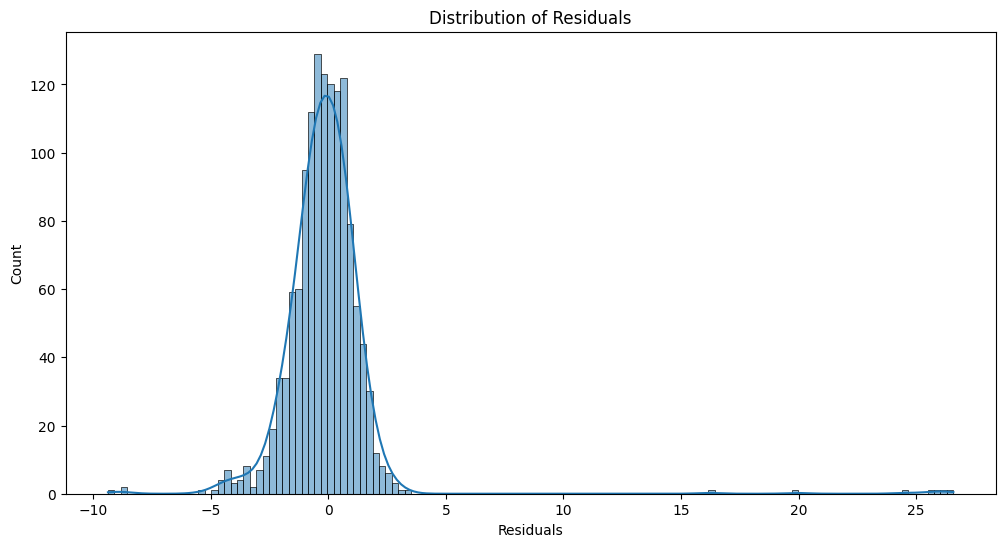

In [70]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

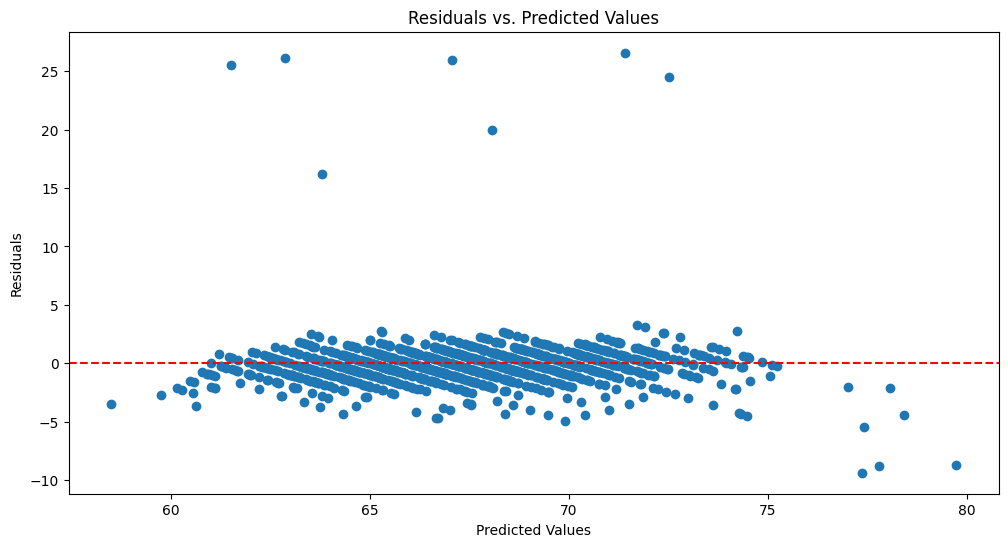

In [71]:
# Residuals vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

We can also perform cross-validation with our model on the dataset.

In [73]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Average R² score: {cv_scores.mean():.2f}")

Cross-Validation R² scores: [0.54946915 0.64574349 0.61793681 0.65833445 0.72974424]
Average R² score: 0.64


As we can see the variance between the scores isn't too high, which shows low overfitting, confirming this as a good model. Finally, we can also plot the actual vs predicted scores.

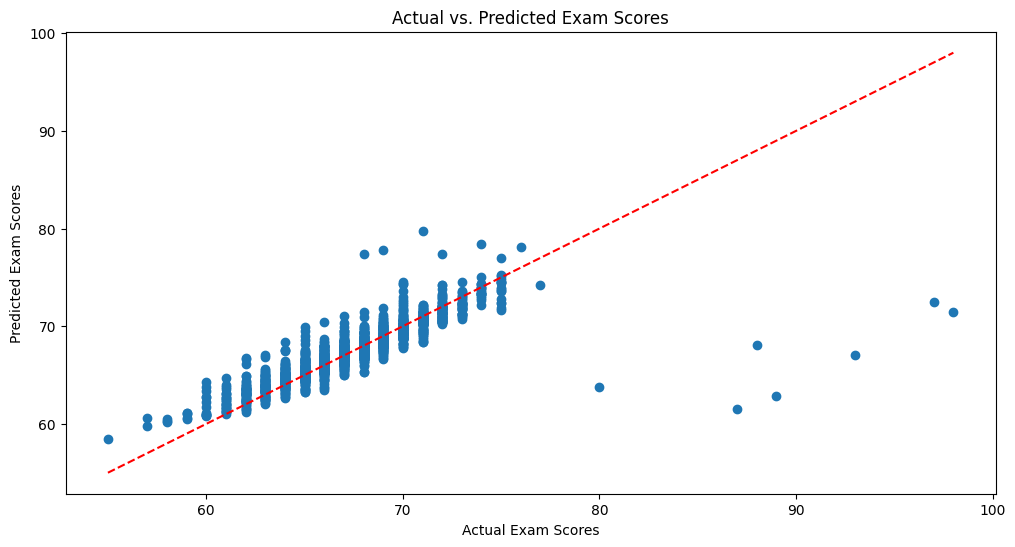

In [74]:
# Predicted vs Actual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

As we can see, it largely is capable of predicting but was unable to handle outliers with higher scores. To wrap it up, we can save the model for future deployment purposes.

In [75]:
# Save the model to a file
joblib.dump(best, 'student_performance_model.pkl')

['student_performance_model.pkl']